#Trabajo práctico n° 3: Clasificación de imágenes a través de Redes convolucionales

Lo primero que se realizó fue importar las librerías y montar el drive. Tras esto, se cargaron los datos, normalizando los X_train y X_test al dividirlos por 255 (el valor máximo de intensidad de un px en cada capa de RGB). X_train y X_test contienen las imágenes a clasificar en forma de matriz. Los labels del X_train se encuentran en el archivo (y la variable del mismo nombre) Y_train.
Las clasificaciones corresponden a 100 clases del conjunto dataset de CIFAR-100. X_train contiene 500 imágenes por clase, es decir, un total de 50000 imágenes y X_test 100 imágenes por clase, dando un total de 10000. Estas imágenes son imágenes RGB con dimensiones de 32x32 px. Es decir, de muy poca resolución. Dentro de todas las notebooks en la carpeta Modelos - notebooks se podrán visualizar ejemplos del dataset
A continuación visulizamos las 100 clases:     

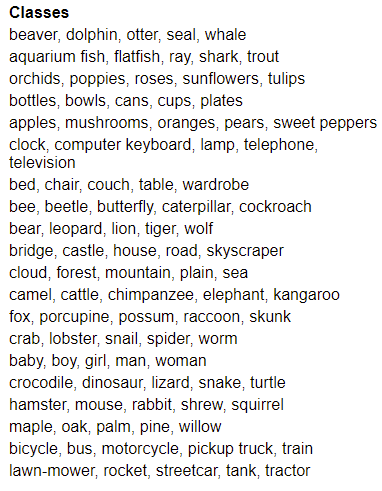

Estas clases están numeradas. Se realizó un One Hot Encoding de los labels de Train convirtiendo la data a una matriz binaria donde True (1) sería la clase a la que pertenece y False (0) el resto de las clases.

El primer intento realizado fue dentro del notebook 'TP3 - Redes' Dentro de la carpeta 'Modelos - Notebooks'. En el mismo, se definió un modelo de red convolucional 2D:      

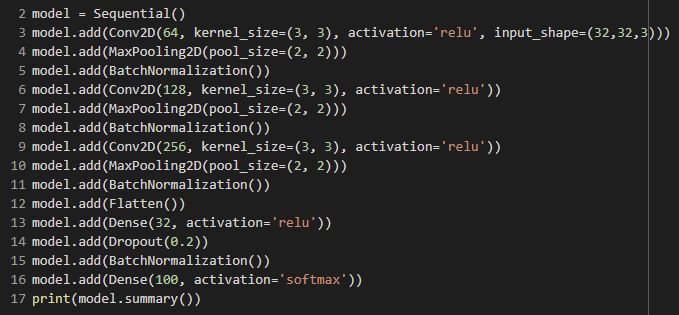

Inicialmente se realizó sin las capas de Batch normalization y dropout. Sin emabargo, el modelo no mostró buenos resultados e incluso había overfitting ya presente a partir de los 10/15 epochs.

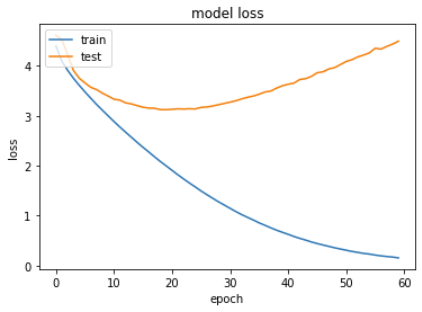

Resultado de uno de los entrenamientos

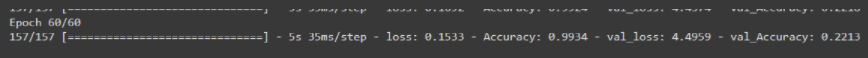

El valor de accuracy en validación seguía siendo muy bajo a pesar de agregarle capas de batch normalization y drop out para limitar el crecimiento de los pesos, estas capas bajaron el nivel de overfitting presentado pero no mejoraron la métrica.

También se implementó la red Resnet con transfer learning de 'imagenet' junto con una capa densa final con función softmax para ajustar a las clasificaciones, sin embargo los resultados en validación no fueron muy buenos, ya que se congelaron los valores para que no fuera entrenable#

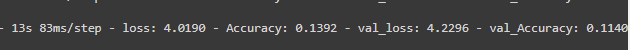

Lo siguiente que se intentó fue definir una red VGG de cero.



Las capas convolucionales fueron inicializadas con 'he_normal', que toma muestras de una distribución normal truncada centrada en cero con desvio estándar sqrt(2/ fan_in) siendo fan_in el numero de unidades input en el tesor de pesos.

Primero se intentó con un solo bloque de VGG de 32 filtros y maxpooling 

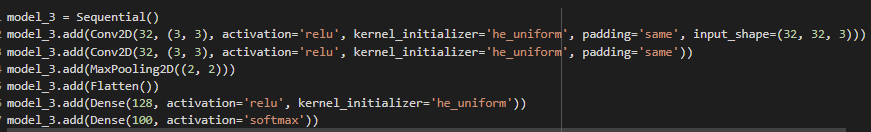
Aumentó levemente el accuracy respecto a modelos anteriores:

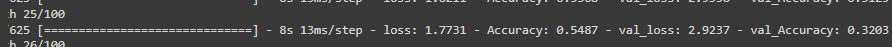

Se agregó más bloques, esta vez con más filtros#

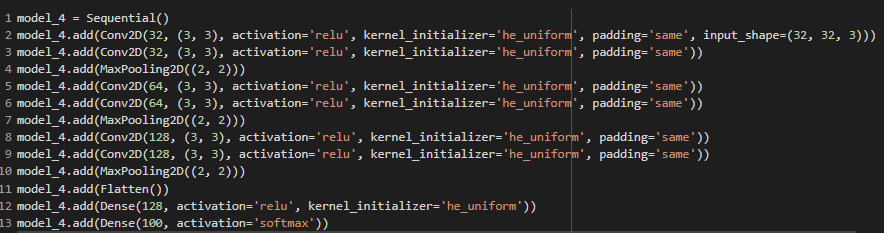

Con un accuracy en validation alcanzado

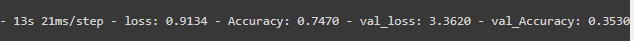

Ya se notaba un overfitting en el training, por lo cual se añadieron capas de dropout entre medio de los bloques con el mismo valor.

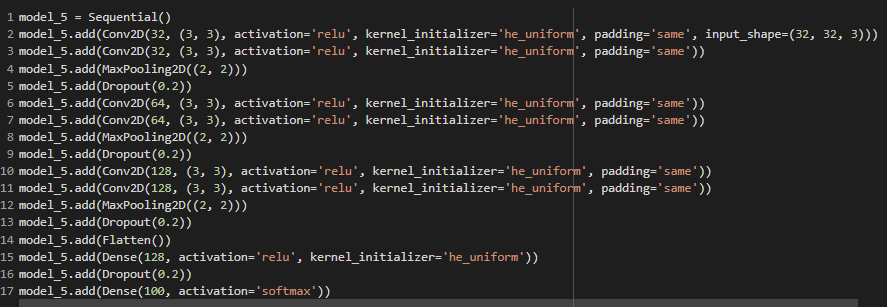

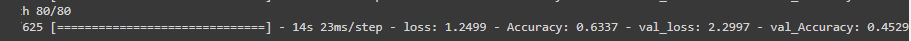

Se intentó también realizar una regularización con L2, sin embargo, los valores de accuracy en validación no mejoraron respecto a solo dropout.

Luego, agregamos capas de Batch normalization entre los bloques con lo cual se alcanzó:

Se llegó a un valor de accuracy de 0.4579
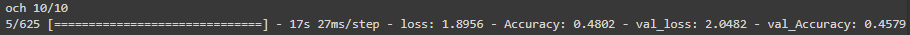

Con esta red se realizó el primer submission ( 'submission.csv') dentro de la competencia el cual tomó un valor de:      

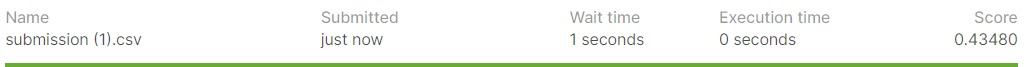

Tanto en en la notebook 'TP3 - Redes' como en  'Copia 2 de TP3_redes' se entrenaron los distintos modelos, previamente se muestran los mejores resultados encontrados (ver 'Copia 2 de TP3_redes' en Modelos - Notebooks, es el archivo donde se encuentran los resultados previos)

Se intentó profundizar la red VGG y la MLP, pero no se consiguieron mayores valores de accuracy, en algunos casos incluso empeoró el rendimiento del mismo. Al variar los valores del dropout ( ya que todos estaban seteados en 0.2) se vió una mejor en el accuracy de validación, sin embargo, al realizarl el submission de las predicciones de dicho modelo con los X_test, este dio un score peor al presentado previamente.

Se complejizó la red y se entrenó primero con un leaning rate de 0.001 en 60 epochs y al finalizar, sin volver a compilar se procedió a entrenar con un de 0.000001 (ver en la notebook VGG 0.53, en la sección Con dropout + Batch Normalization más capas - Variamos los valores de dropout). De esta forma se consiguió un valor de accuracy en validación de

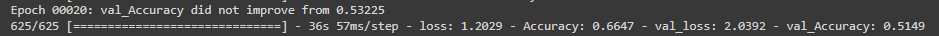

Los pesos para el accuracy de 0.53 fueron guardados por lo cual se realizó una predicción con dichos pesos resultando en kaggle en un score de#

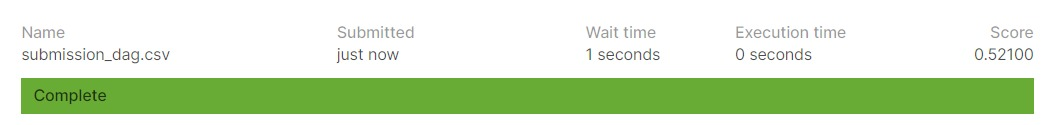

Tras eso, se intentó mejorar el modelos o realizar otros enfoques pero no se alcanzaba una perfomance mejor a la de los modelos realizados. Por lo tanto, se implementó Data Augmentation. Se investigó y encontró diferentes modificaciones que se podían realizas a nuestros datos de training. Lo que se buscaba con esta implementación era ampliar la cantidad de información a través de transformaciones como zoom en la imágen, que haga un flib horizontal o vertical, de tal forma que se tuviese más información de como ajustar el modelo a las clases, pero sin distorcionar la imagen en demasía de tal forma que las características útiles para ajustar el modelo no fueran preservadas.
Las transofrmaciones que se realizaron fueron flip horizontal, zoom en la imagen y rotación.

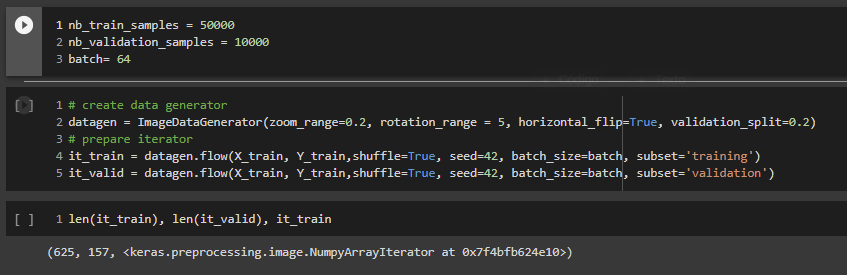

Primero se intentó con una ResNet con transfer learning, sin embargo no dio buenos resultados#

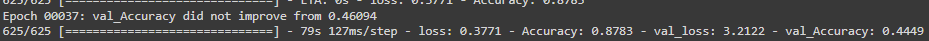

Dado que la VGG había dado buenos resultados previamente, se decidió utilizar la VGG16 presente en la librería de python keras. A esta se le realizó transfer learning a través de los pesos de imagenet. En un principio se hicieron que los pesos no fueran entrenables no dando buenos resulltados. Cuando se dejaron entrenables los pesos, el valor de accuracy para la validación alcanzó un valor de 0.60567.

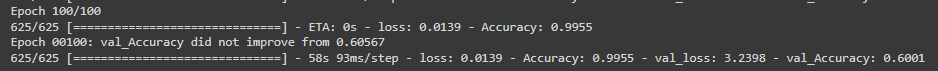

Se realizó un submit con dicho modelo dando el último valor presentado en la competencia. El modelo entrenado se encuentra en la Notebook 'VGG y Resnet' (fuera de la carpeta de notebooks para facilitar su visualización).

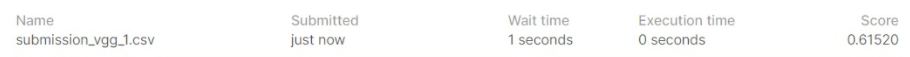

Una vez alcanzado este valor, se intentó aumentar la cantidad de transformaciones generadas en el data augmentation, sin embargo no se consiguieron mejores resultados al presentado (estas modificaciones se encuentran en las notebooks 'Copia de VGG + param Data Augmentation' y 'Prueba con VGG+data augmentation'). Si bien se intentaron ajustar los hiperparámetros para ajustar el entrenamiento, no pareció afectar el resultados de los mismos, desconocemos si es por falta de epochs, la inicialización aleatoria en las capas densas finales o si es por alguna otra razón.